In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('C:/Users/hp/OneDrive/Documents/Machine Learning Practice/Datasets/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
df.shape

(22, 3)

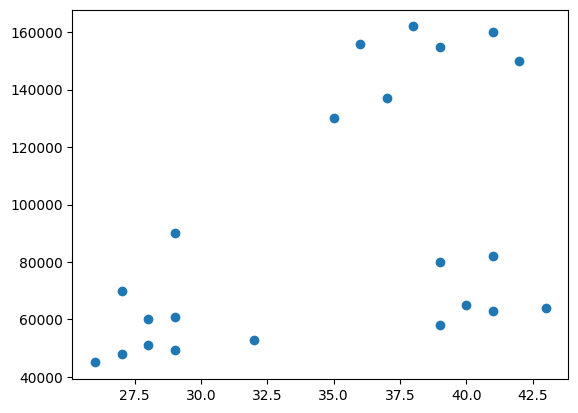

In [7]:
plt.scatter(df['Age'], df['Income($)'])

In [8]:
km = KMeanns(n_clusters=3)
km

KMeans(n_clusters=3)

In [16]:
y_predicted = km.fit_predict(df[['Age']], df['Income($)'])
y_predicted

array([1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2])

In [17]:
df['cluster'] = y_predicted

In [18]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


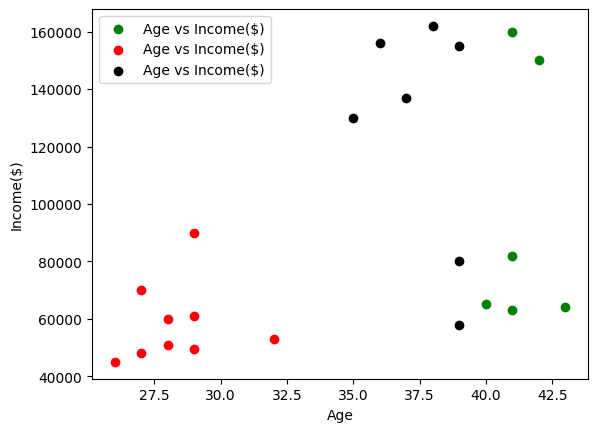

In [28]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1['Age'], df1['Income($)'], color='green', label="Age vs Income($)")
plt.scatter(df2['Age'], df2['Income($)'], color='red', label="Age vs Income($)")
plt.scatter(df3['Age'], df3['Income($)'], color='black', label="Age vs Income($)")

plt.xlabel("Age")
plt.ylabel("Income($)")

plt.legend()

plt.show()

In [32]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [36]:
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,-0.384614,1
1,Michael,29,-0.384612,1
2,Mohan,29,-0.384614,1
3,Ismail,28,-0.384614,1
4,Kory,42,-0.384608,0


In [37]:
scaler.fit(df[['Age']])

MinMaxScaler()

In [38]:
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,-0.384614,1
1,Michael,0.176471,-0.384612,1
2,Mohan,0.176471,-0.384614,1
3,Ismail,0.117647,-0.384614,1
4,Kory,0.941176,-0.384608,0


# KMeans Clustering

In [83]:
km = KMeans(n_clusters=2)

In [84]:
y_predicted = km.fit_predict(df[['Age']], df['Income($)'])

In [85]:
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [86]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,-0.384614,1
1,Michael,0.176471,-0.384612,1
2,Mohan,0.176471,-0.384614,1
3,Ismail,0.117647,-0.384614,1
4,Kory,0.941176,-0.384608,0


In [87]:
km.cluster_centers_

array([[0.78280543],
       [0.1372549 ]])

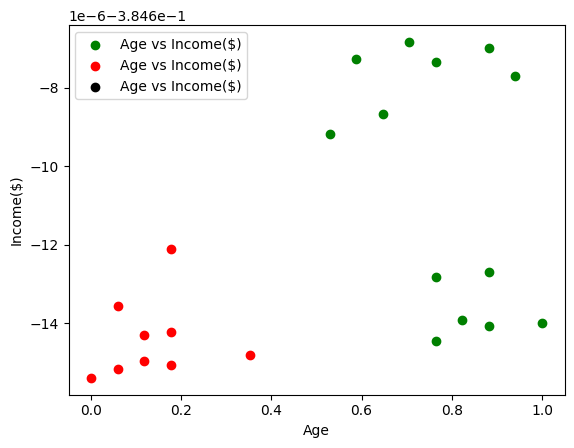

In [88]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1['Age'], df1['Income($)'], color='green', label="Age vs Income($)")
plt.scatter(df2['Age'], df2['Income($)'], color='red', label="Age vs Income($)")
plt.scatter(df3['Age'], df3['Income($)'], color='black', label="Age vs Income($)")

#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,0])

plt.xlabel("Age")
plt.ylabel("Income($)")

plt.legend()

plt.show()

In [ ]:
k_rng = range(1, 10)
sse = []
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)
    

In [81]:
sse

[2.5303554579032137,
 0.314080383414352,
 0.15562283751391345,
 0.09022491363503159,
 0.05562283748291855,
 0.031372549131649115,
 0.020299884766840255,
 0.014244521428905678,
 0.010092272293135045]

# Elbow Technique

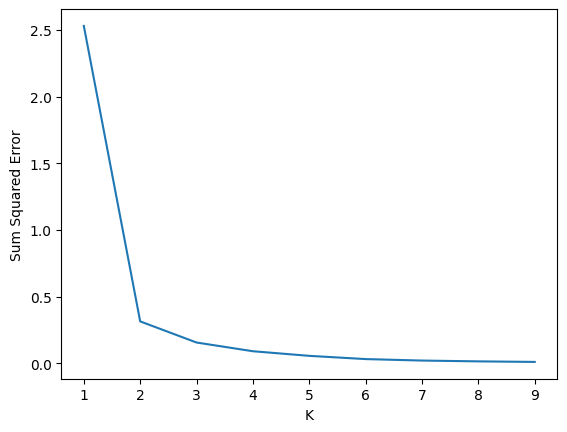

In [82]:
plt.xlabel("K")
plt.ylabel("Sum Squared Error")
plt.plot(k_rng, sse)